# Binary Data 

In [76]:
## need this 

from astropy.io import fits
import matplotlib.pyplot as plt 

file = fits.open('Project 1/all_columns_catalog_shift.fits') 
hdr = file[0].header
data = file[1].data


In [77]:
## need this 
cols = data.columns

In [78]:
## for data, each row corresponds to a binary pair. For every row, data about each star is entered one after the other.
## For example, the first two entries in a row are the same type of data, with one corresponding to each star 

In [79]:
import numpy as np
WDWD = data[np.nonzero(data['binary_type'] == 'WDWD')] 


In [80]:
from astropy import units as u

def absolute_mag(rel_mag, parallax):
    """Provide this function with relative magnitude and parallax in mas
    """
    parsec = (parallax*u.mas).to(u.pc, equivalencies=u.parallax())
    return rel_mag - 5*np.log10(parsec/(10*u.pc))

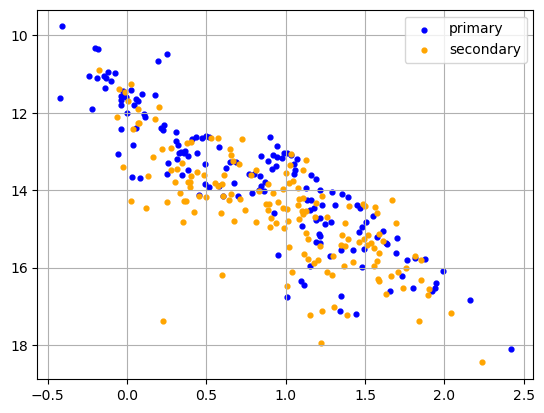

In [81]:
## need this 
from astropy.table import QTable, Table, Column

data_rows = WDWD
table = Table(rows=data_rows, names=cols.names)

for i in [1, 2]:
    for col in ['phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']:

        colname = col + str(i)
        new_colname = col + '_abs' + str(i)
        dist = table['parallax' + str(i)]

        table[new_colname] = absolute_mag(table[colname], dist)

G1 = table['phot_g_mean_mag_abs1']
BPRP1 = table['phot_bp_mean_mag_abs1'] - table['phot_rp_mean_mag_abs1']

plt.scatter(BPRP1, G1, 12, color='blue', label='primary')

G2 = table['phot_g_mean_mag_abs2']
BPRP2 = table['phot_bp_mean_mag_abs2'] - table['phot_rp_mean_mag_abs2']

plt.scatter(BPRP2, G2, 12, color='orange', label='secondary')

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.grid(which='both')
plt.legend()

In [82]:
table

solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,phot_g_mean_mag_abs1,phot_bp_mean_mag_abs1,phot_rp_mean_mag_abs1,phot_g_mean_mag_abs2,phot_bp_mean_mag_abs2,phot_rp_mean_mag_abs2
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Star formation times

In [83]:
import pandas as pd

binary_data = pd.read_csv('Project 1/Table_A1.csv')

# all in Gyr
age_cols = ['cool_ageH_1', 'cool_ageH_2', 'tot_age_1', 'tot_age_2', 'init_mass_1', 'init_mass_2']
age_data = binary_data.dropna(axis=0, subset=age_cols)[age_cols].copy()

age_data['form_time_1'] = age_data['tot_age_1'] - age_data['cool_ageH_1']
age_data['form_time_2'] = age_data['tot_age_2'] - age_data['cool_ageH_2']
age_data['mass_ratio'] = age_data['init_mass_2'] / age_data['init_mass_1']


Text(0, 0.5, 'Star 2 age (Gyr)')

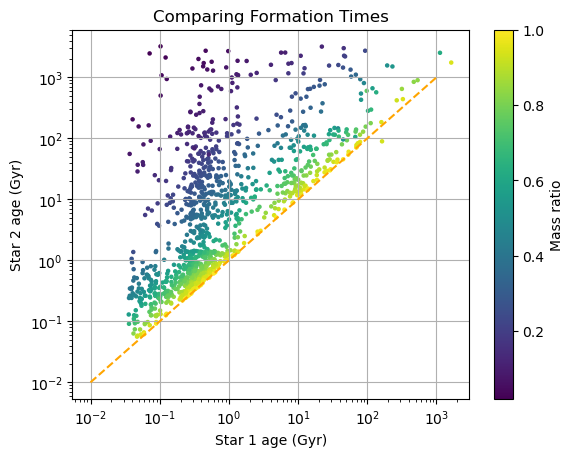

In [84]:
# Plot
plt.scatter(age_data['form_time_1'], age_data['form_time_2'], 5, c=age_data['mass_ratio'])
plt.colorbar(label='Mass ratio')
plt.loglog()

x = np.logspace(-2, 3, 6)
plt.plot(x, x, linestyle='dashed', color='orange')
plt.grid()

plt.title('Comparing Formation Times')
plt.xlabel('Star 1 age (Gyr)')
plt.ylabel('Star 2 age (Gyr)')

# plt.xlim(0, 10)
# plt.ylim(0, 10)

(array([0.47585266, 0.68828688, 1.05367375, 0.93471058, 0.99419217,
        0.84973689, 1.07066849, 1.20662639, 1.24061586, 1.68247905]),
 array([0.01930428, 0.11737385, 0.21544343, 0.313513  , 0.41158257,
        0.50965214, 0.60772171, 0.70579128, 0.80386086, 0.90193043,
        1.        ]),
 <BarContainer object of 10 artists>)

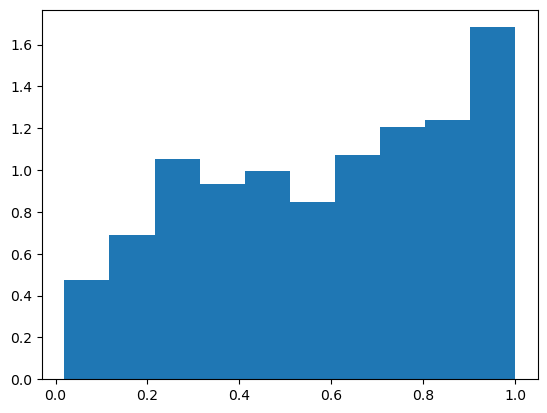

In [85]:
plt.hist(age_data['mass_ratio'], density=True)

In [86]:
age_data.query('form_time_1 < 10 & form_time_2 < 10').shape

(718, 9)

In [87]:
age_data.shape

(1200, 9)